In [1]:
import utils
import torch
import torch.nn as nn
import AUXN
import matplotlib.pyplot as plt

In [2]:
model = AUXN.AuxiliaryNet()
criterion = nn.CrossEntropyLoss()
(train_input, train_target, train_classes), (test_input,
                                             test_target, test_classes) = utils.generate_dataset(1000)
train_dataset, test_dataset = utils.preprocess_dataset(train_input, train_target, train_classes, test_input,
                                                       test_target, test_classes)

utils.train_model(model, train_dataset, test_dataset, criterion, epochs=50, **
                  {"lr": 0.005, "weight_decay": 0.0001, "batch_size": 100, "aux_param": 0.2})

GPU (CUDA) is available!
Epoch 0 , Current learning rate: [0.005] , Epoch loss: 17.418031692504883
Epoch 1 , Current learning rate: [0.005] , Epoch loss: 15.097920179367065
Epoch 2 , Current learning rate: [0.005] , Epoch loss: 14.598367094993591
Epoch 3 , Current learning rate: [0.005] , Epoch loss: 14.350972890853882
Epoch 4 , Current learning rate: [0.005] , Epoch loss: 13.932351231575012
Epoch 5 , Current learning rate: [0.005] , Epoch loss: 13.604546427726746
Epoch 6 , Current learning rate: [0.005] , Epoch loss: 13.5091792345047
Epoch 7 , Current learning rate: [0.005] , Epoch loss: 13.48755657672882
Epoch 8 , Current learning rate: [0.005] , Epoch loss: 13.46717095375061
Epoch 9 , Current learning rate: [0.005] , Epoch loss: 13.458851099014282
Epoch 10 , Current learning rate: [0.005] , Epoch loss: 13.395645141601562
Epoch 11 , Current learning rate: [0.005] , Epoch loss: 13.396801471710205
Epoch 12 , Current learning rate: [0.005] , Epoch loss: 13.351804614067078
Epoch 13 , Cur

(tensor([17.4180, 15.0979, 14.5984, 14.3510, 13.9324, 13.6045, 13.5092, 13.4876,
         13.4672, 13.4589, 13.3956, 13.3968, 13.3518, 13.3552, 13.3452, 13.2812,
         13.2509, 13.2516, 13.2754, 13.2320, 13.2466, 13.2358, 13.2314, 13.2357,
         13.2321, 13.2214, 13.2259, 13.2285, 13.2074, 13.2013, 13.1936, 13.2113,
         13.2021, 13.2025, 13.2079, 13.2042, 13.2170, 13.1987, 13.1970, 13.1955,
         13.2083, 13.2001, 13.1968, 13.2084, 13.2089, 13.2073, 13.1956, 13.2096,
         13.2045, 13.1924]),
 tensor([0.7270, 0.8460, 0.8830, 0.9050, 0.9220, 0.9400, 0.9420, 0.9360, 0.9460,
         0.9430, 0.9590, 0.9580, 0.9610, 0.9550, 0.9590, 0.9610, 0.9630, 0.9570,
         0.9630, 0.9640, 0.9660, 0.9670, 0.9640, 0.9700, 0.9700, 0.9660, 0.9720,
         0.9660, 0.9660, 0.9730, 0.9720, 0.9700, 0.9640, 0.9660, 0.9690, 0.9670,
         0.9730, 0.9660, 0.9660, 0.9730, 0.9670, 0.9670, 0.9700, 0.9730, 0.9690,
         0.9780, 0.9730, 0.9700, 0.9700, 0.9680]),
 tensor([0.7350, 0.8300, 0.87

Output: 0
Softmax result class 1: 0.9994872808456421
Softmax result class 2: 0.0005126874893903732
Test target: 1
Test class 1: 4
Test class 2: 5
Digit 1: 7
Digit 2: 5


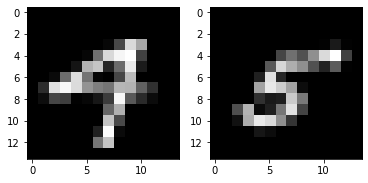

In [33]:
for sample in range(999):
    pd, digit1, digit2 = model(test_input[sample:sample+2].to("cuda")) # +2 to make it look like batch size
    result=0 if pd[0,0].item()>pd[0,1].item() else 1
    if result != test_target[sample].item():
        print("Output:",result)
        print("Softmax result class 1:",pd[0,0].item())
        print("Softmax result class 2:",pd[0,1].item())
        print("Test target:",test_target[sample].item())
        print("Test class 1:",test_classes[sample][0].item())
        print("Test class 2:",test_classes[sample][1].item())
        print("Digit 1:",torch.argmax(digit1).item())
        print("Digit 2:",torch.argmax(digit2).item())
        # pick a sample to plot
        image1, image2 = test_input[sample].split(split_size=1, dim=0)
        # plot the sample
        fig = plt.figure()
        plt.subplot(121)
        plt.imshow(image1.squeeze(), cmap='gray')
        plt.subplot(122)
        plt.imshow(image2.squeeze(), cmap='gray')
        plt.show()
        break